<a href="https://colab.research.google.com/github/Biline-dev/IARN/blob/main/TP_4_regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Réalisé par:

Boulmaali Linda Imene, 181832040766

# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1HuaqJQ7hV1ylIkSQbflFvPEzsOyausKA'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv') 

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
m,n =data.shape
print(m, n)

118 3


Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X2=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X2.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [ ]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    


In [ ]:
X=mapping(X2)
X.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));
 

In [ ]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostReg(X, y,theta, landa):

    k=y*np.log(Sigmoid(np.dot(X,theta)))+(1-y)*np.log(1-Sigmoid(np.dot(X,theta)))
    return -(1/m)*(np.sum(k) + np.sum(landa*(theta[1:]**2)))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    theta_history = []
    cost_history = []
     
    for iter in range(iterations):
      
      cost_history.append(computeCostReg(X, y, theta,landa))
      hypothesis = Sigmoid(np.dot(X,theta))
      diff = hypothesis-y
      diff_=(X*diff)
      theta_=diff_.mean(axis=0)
      theta_=theta_.reshape(theta_.shape[0],1)
      theta[0] = theta[0]  - (1 / m) * alpha *np.sum(diff_[:,0])
      for i in range(1,len(theta)):
        theta[i] = theta[i] * (1 - landa* alpha / m) - (alpha/m) * np.sum(diff_[:,i])
      #print(theta.shape)
      theta_history.append(theta)
    return theta,  np.array(cost_history), np.array(theta_history)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))

Calculer le cout initial

In [ ]:
landa=1
print(X.shape, theta.shape)
initialCost=computeCostReg(X, y, theta, landa)
print(initialCost)

(118, 28) (28, 1)
0.6931471805599454


Appel des la fonction de calcul du gradient

[0.69314718 0.69263641 0.69213111 ... 0.34864332 0.34863289 0.34862247]


Text(0, 0.5, 'cost')

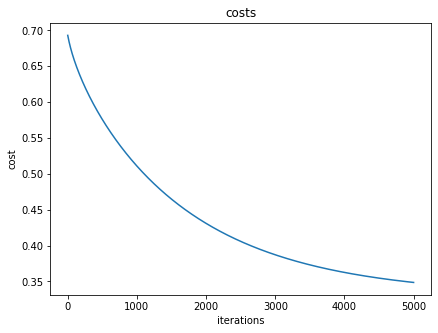

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
# paramètres
iterations = 5000;
alpha = 0.04;

# paramètre de regression
lambdaa = 1;

# Appel
theta, cost_history, theta_history = gradientDescent(X, y, theta, alpha, iterations, landa);
print(cost_history)


#cost function plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_history.shape[0]), cost_history)
plt.xlabel('iterations')
plt.ylabel('cost')

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

Source d'inspiration: https://colab.research.google.com/github/cbernet/maldives/blob/master/overfitting/overfitting.ipynb#scrollTo=auq_i7mxFDnG

In [ ]:
def drawCircle(X, y, theta, title="", linrange=101):
    npoints = linrange
    gridx1, gridx2 = np.meshgrid(np.linspace(X[:, 1].min(),X[:, 1].max(),npoints), np.linspace(X[:, 2].min(),X[:, 2].max(),npoints))
    grid = np.c_[np.ones(gridx1.size),gridx1.flatten(), gridx2.flatten()]
    print(gridx1.shape)
    Z = (mapping(grid) @ theta).reshape(gridx1.shape)

    plt.contour(gridx1, gridx2, Z, levels=[0], colors= "black", linestyles="solid", linewidths=3)
    #plt.pcolor(gridx1, gridx2, Z, cmap='binary')
    plt.scatter(X2[np.where(y==1),1],X2[np.where(y==1),2], label="y=1",marker ='o')
    plt.scatter(X2[np.where(y==0),1],X2[np.where(y==0),2], label="y=0",marker ='x')

    plt.title(title)
    plt.xlabel('x 1')
    plt.ylabel('x 2')
    plt.show()

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict(X, theta):
    K=Sigmoid(X@theta)
    y_pred=np.ones((X.shape[0],1))
    y_pred[np.where(K < 0.5)] = 0
    return y_pred

# Affichage 
Graphe representant les acceptations selon les caracteristiques

(101, 101)


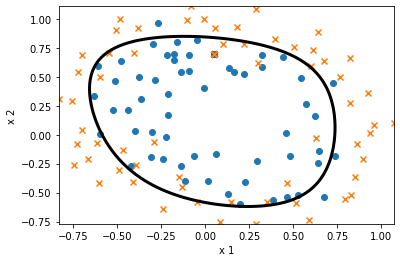

In [ ]:
drawCircle(X2, y, theta, linrange=101)


Traçage du coût en fonction de theta0 et theta1

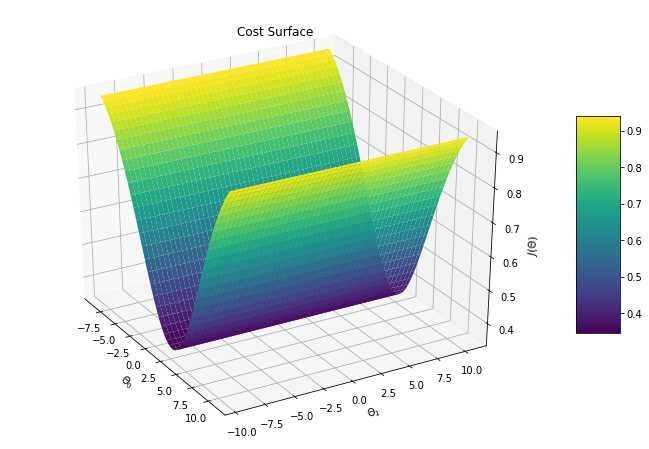

In [ ]:
theta_0, theta_1 = np.meshgrid(np.arange(theta[0] - 10, theta[0] + 10, 0.1), 
                                           np.arange(theta[1] - 10, theta[1] + 10, 0.1))
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        k=np.array([theta_0[i].mean(axis=0), theta_1[j].mean(axis=0)])
        k=k.reshape(k.shape[0], 1)
        t = np.concatenate((k, theta[2:]), axis=0)
        cost_values[i, j] = computeCostReg(X, y, t, landa)

fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()


# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X, theta)
prcision = np.mean(y==y_pred)*100
print(prcision)

83.05084745762711


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
sklearn_model_simple =LogisticRegression()
sklearn_model_simple.fit(X, y)
print("sklearn model  :", sklearn_model_simple.coef_)
print("Notre modele   :", theta )

sklearn model  : [[-9.40316896e-05  6.25200403e-01  1.18110372e+00 -2.01998737e+00
  -9.17422545e-01 -1.43161951e+00  1.24007673e-01 -3.65545995e-01
  -3.57235803e-01 -1.75177398e-01 -1.45813451e+00 -5.09079430e-02
  -6.15531333e-01 -2.74684592e-01 -1.19285084e+00 -2.42159297e-01
  -2.06009268e-01 -4.46834189e-02 -2.77786348e-01 -2.95378201e-01
  -4.56358841e-01 -1.04313960e+00  2.78215032e-02 -2.92419721e-01
   1.56135368e-02 -3.27375607e-01 -1.43860298e-01 -9.24641743e-01]]
Notre modele   : [[ 1.20525453]
 [ 0.58262458]
 [ 1.13138   ]
 [-1.92019119]
 [-0.8306116 ]
 [-1.28501462]
 [ 0.10191019]
 [-0.3425419 ]
 [-0.34136953]
 [-0.18125762]
 [-1.40960773]
 [-0.06604826]
 [-0.58034689]
 [-0.24611633]
 [-1.14675453]
 [-0.24322181]
 [-0.20114167]
 [-0.05872253]
 [-0.25850158]
 [-0.27168587]
 [-0.49102359]
 [-1.01579051]
 [ 0.01109577]
 [-0.28016913]
 [ 0.00479404]
 [-0.30976262]
 [-0.12603283]
 [-0.94016099]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def comparaison_sklearn(X, y, theta):
    sklearn_model = LogisticRegression(penalty='l2')
    sklearn_model.fit(X[:, 1:], y)
    
    theta_sk = np.zeros(theta.shape)
    theta_sk[1:] = sklearn_model.coef_.reshape(-1, 1)
    theta_sk[0] = sklearn_model.intercept_[0]
    theta_sk = np.reshape(theta_sk, (-1, 1))
    
    plt.figure(figsize=(25, 10))
    plt.subplot(1, 2, 2)
    drawCircle(X2,y, theta, " Notre modele", linrange=101)
    plt.subplot(1, 2, 2)
    drawCircle(X2,y, theta_sk, " sklearn Modele", linrange=101)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(101, 101)


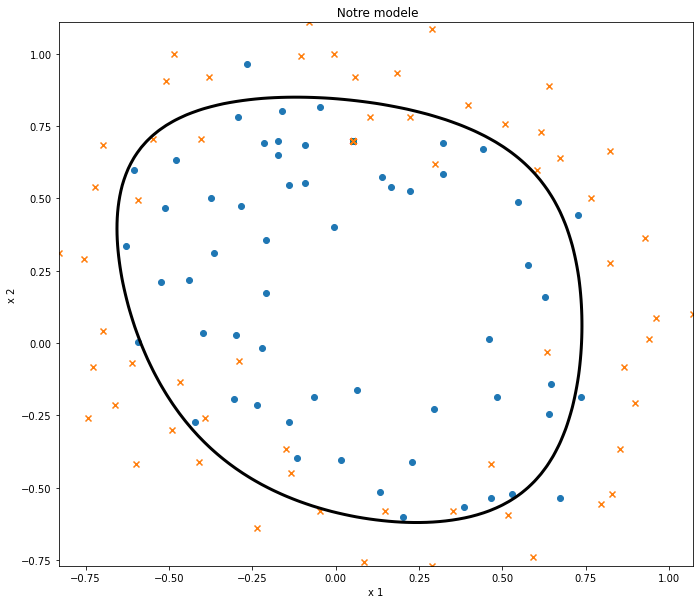

(101, 101)


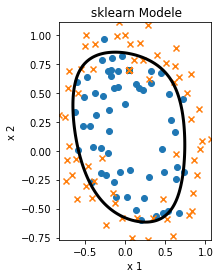

In [ ]:
comparaison_sklearn(X, y, theta)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
X_max, X_min = X[:, 1:].max(axis=0), X[:, 1:].min(axis=0)
X_normalized = (X[:, 1:] - X_min) / (X_max - X_min)
X_normalized=np.column_stack((intercept,X_normalized[:, :2]))
y_max, y_min = y.max(), y.min()
y_normalized = (y - y_max) / (y_max - y_min)

Text(0, 0.5, 'cost')

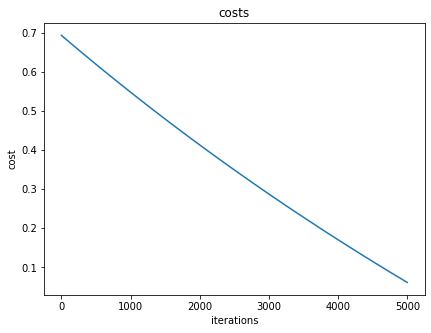

In [ ]:
# paramètres
iterations = 5000
alpha = 0.0001
theta = np.zeros((X_normalized.shape[1], 1))
# Appel
theta, cost_normalized, theta_normalized  = gradientDescent(X_normalized, y_normalized, theta, alpha, iterations, landa)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_normalized.shape[0]), cost_normalized)
plt.xlabel('iterations')
plt.ylabel('cost')

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [ ]:
# bonne chance